# Generating noise in tabular data

This tutorial shows how to generate noise on pre-existing tabular data and to visualize both the original and the transformed data




In [1]:
from sklearn.datasets import make_blobs
from badgers.generators.tabular_data.noise import GaussianNoiseGenerator, GaussianNoiseClassesGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def plot_noise(X, y, Xt, yt):
    """
    Some utility function to generate the plots
    """
    fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8,4))
    sns.scatterplot(data=X, x='dimension_0', y='dimension_1', hue=y, ax=axes[0])
    sns.scatterplot(data=Xt, x='dimension_0', y='dimension_1', hue=yt, ax=axes[1])
    axes[0].set_title('Original')
    axes[1].set_title('Transformed')
    return fig, axes


## Setup random generator

In [3]:
from numpy.random import default_rng
seed = 0
rng = default_rng(seed)

## Load and prepare data

We first load an existing dataset from `sklearn.datasets`

In [4]:
# load data
X, y = make_blobs(centers=4, random_state=0, cluster_std=0.25)
X = pd.DataFrame(data=X, columns=['dimension_0', 'dimension_1'])
y = pd.Series(y)

## Generate noise

The transformer applies an additive Gaussian noise to each dimension

In [5]:
trf = GaussianNoiseGenerator(random_generator=rng)
Xt, yt = trf.generate(X.copy(), y, noise_std=0.25)

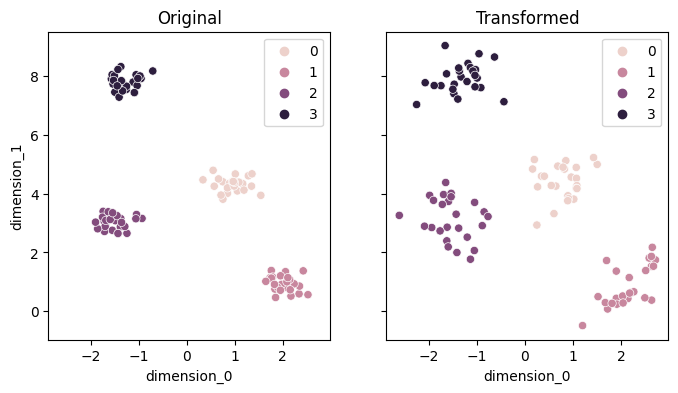

In [6]:
fig, axes = plot_noise(X, y, Xt, yt)

## Generate noise for each class separately

The transformer applies an additive Gaussian noise to each dimension for each class separately.

In [7]:
trf = GaussianNoiseClassesGenerator(random_generator=rng)
Xt, yt = trf.generate(X.copy(), y, noise_std_per_class={0:0.1, 1:0.2, 2:0.3, 3:0.4})

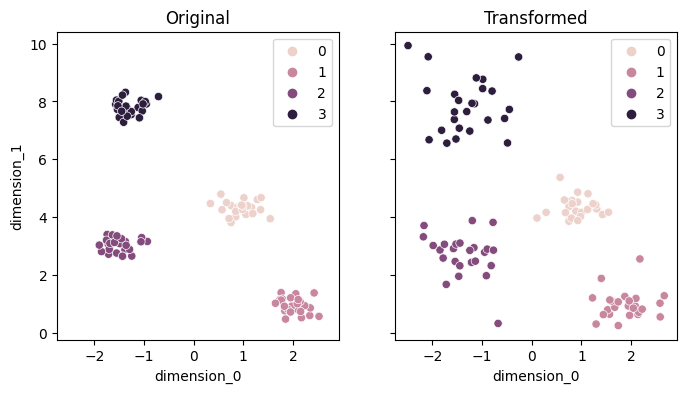

In [8]:
fig, axes = plot_noise(X, y, Xt, yt)